In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
plt.rcParams["font.sans-serif"] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

In [99]:
ufo = pd.read_csv("ufo_awesome.tsv",sep="\t",error_bad_lines=False,header=None,warn_bad_lines=False)

In [100]:
ufo.head()

,0,1,2,3,4,5
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [101]:
len(ufo)

61069

In [102]:
ufo.columns=["OccurDate","ReportDate","Location","ShortDescription","Duration","LongDescription"]

In [103]:
ufo.head()

,OccurDate,ReportDate,Location,ShortDescription,Duration,LongDescription
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [104]:
pd.DataFrame([x.split(" ") for x in ufo.Duration if type(x)==str]).head()

,0,1,2,3,4,5,6,7
0,2,min.,None,None,None,None,None,None
1,2,min.,None,None,None,None,None,None
2,30,min.,None,None,None,None,None,None
3,2,min.,None,None,None,None,None,None
4,6,min.,None,None,None,None,None,None


In [105]:
ufo.OccurDate = ufo.OccurDate.astype(str)
ufo.ReportDate = ufo.ReportDate.astype(str)

In [106]:
ufo = ufo[np.logical_and(ufo.OccurDate.apply(len)==8,ufo.ReportDate.apply(len)==8)]

In [109]:
ufo.head()

,OccurDate,ReportDate,Location,ShortDescription,Duration,LongDescription
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [111]:
ufo["OccurDate"] = pd.to_datetime(ufo.OccurDate,errors="coerce")
ufo["ReportDate"] = pd.to_datetime(ufo.ReportDate,errors="coerce")

In [112]:
ufo.head()

,OccurDate,ReportDate,Location,ShortDescription,Duration,LongDescription
0,1995-10-09,1995-10-09,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,1995-10-10,1995-10-11,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,1995-01-01,1995-01-03,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,1995-05-10,1995-05-10,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,1995-06-11,1995-06-14,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [113]:
ufo["City"] = pd.DataFrame([x.split(",") for x in ufo.Location if type(x)==str])[0]
ufo["State"] = pd.DataFrame([x.split(",") for x in ufo.Location if type(x)==str])[1]

In [114]:
ufo.head()

,OccurDate,ReportDate,Location,ShortDescription,Duration,LongDescription,City,State
0,1995-10-09,1995-10-09,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",Iowa City,IA
1,1995-10-10,1995-10-11,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",Milwaukee,WI
2,1995-01-01,1995-01-03,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,Shelton,WA
3,1995-05-10,1995-05-10,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,Columbia,MO
4,1995-06-11,1995-06-14,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,Seattle,WA


In [115]:
ufo["Dur"] = pd.DataFrame([x.split(" ") for x in ufo.Duration if type(x)==str])[0] 

In [116]:
ufo.head()

,OccurDate,ReportDate,Location,ShortDescription,Duration,LongDescription,City,State,Dur
0,1995-10-09,1995-10-09,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by...",Iowa City,IA,2
1,1995-10-10,1995-10-11,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri...",Milwaukee,WI,2
2,1995-01-01,1995-01-03,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...,Shelton,WA,30
3,1995-05-10,1995-05-10,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...,Columbia,MO,2
4,1995-06-11,1995-06-14,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...,Seattle,WA,6


In [117]:
ufo = ufo.drop(["Location","ShortDescription","Duration"],axis=1)

In [118]:
ufo.head()

,OccurDate,ReportDate,LongDescription,City,State,Dur
0,1995-10-09,1995-10-09,"Man repts. witnessing &quot;flash, followed by...",Iowa City,IA,2
1,1995-10-10,1995-10-11,"Man on Hwy 43 SW of Milwaukee sees large, bri...",Milwaukee,WI,2
2,1995-01-01,1995-01-03,Telephoned Report:CA woman visiting daughter w...,Shelton,WA,30
3,1995-05-10,1995-05-10,Man repts. son&apos;s bizarre sighting of smal...,Columbia,MO,2
4,1995-06-11,1995-06-14,Anonymous caller repts. sighting 4 ufo&apos;s ...,Seattle,WA,6


In [119]:
Sort = ["OccurDate","ReportDate","City","State","Dur","LongDescription"]
ufo = ufo[Sort]

In [120]:
ufo.head()

,OccurDate,ReportDate,City,State,Dur,LongDescription
0,1995-10-09,1995-10-09,Iowa City,IA,2,"Man repts. witnessing &quot;flash, followed by..."
1,1995-10-10,1995-10-11,Milwaukee,WI,2,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,1995-01-01,1995-01-03,Shelton,WA,30,Telephoned Report:CA woman visiting daughter w...
3,1995-05-10,1995-05-10,Columbia,MO,2,Man repts. son&apos;s bizarre sighting of smal...
4,1995-06-11,1995-06-14,Seattle,WA,6,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [121]:
ufo.rename(columns={"Dur":"Duration"},inplace=True)

In [122]:
ufo.head()

,OccurDate,ReportDate,City,State,Duration,LongDescription
0,1995-10-09,1995-10-09,Iowa City,IA,2,"Man repts. witnessing &quot;flash, followed by..."
1,1995-10-10,1995-10-11,Milwaukee,WI,2,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,1995-01-01,1995-01-03,Shelton,WA,30,Telephoned Report:CA woman visiting daughter w...
3,1995-05-10,1995-05-10,Columbia,MO,2,Man repts. son&apos;s bizarre sighting of smal...
4,1995-06-11,1995-06-14,Seattle,WA,6,Anonymous caller repts. sighting 4 ufo&apos;s ...


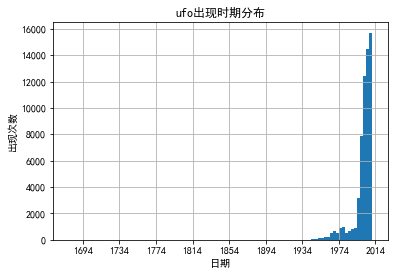

In [131]:
count_, bins_, ignored_ = plt.hist(ufo.OccurDate, 100)
plt.title("ufo出现时期分布")
plt.xlabel("日期")
plt.ylabel("出现次数")
plt.grid()